In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1222,ham,Teach me apps da. When you come to college.,NaN,NaN,NaN
4947,spam,"Hi this is Amy, we will be sending you a free ...",NaN,NaN,NaN
2398,ham,YO YO YO BYATCH WHASSUP?,NaN,NaN,NaN
4014,spam,You will be receiving this week's Triple Echo ...,NaN,NaN,NaN
3946,ham,"Sorry, went to bed early, nightnight",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Bulding
5. Evaluation
6. Improvement

## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder
enc =  LabelEncoder()

df.head()

df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)
df['label'] = enc.fit_transform(df['label'])


In [6]:
df.head(5)

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# missing Values
df.isnull().sum()

label      0
message    0
dtype: int64

In [8]:
# Duplicate values
df.duplicated().sum()

403

In [9]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [10]:
df.shape

(5169, 2)

## EDA


In [11]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

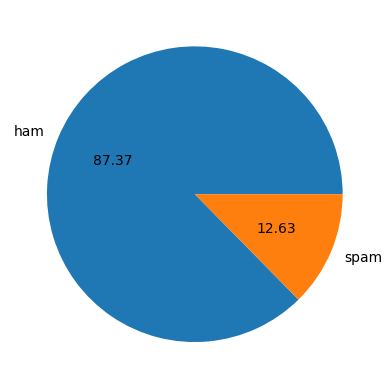

In [12]:
import matplotlib.pyplot as plt

plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

Data is imbalanced

In [13]:
import nltk

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Raj
[nltk_data]     Bhuva\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [15]:
# number of characters
df['num_characters'] = df['message'].apply(len)
df.sample(5)

,label,message,num_characters
1968,0,2 laptop... I noe infra but too slow lar... I ...,58
4984,0,Dont let studying stress you out. L8r.,38
1511,0,Oops sorry. Just to check that you don't mind ...,110
3216,0,Come to mahal bus stop.. &lt;DECIMAL&gt;,40
2025,0,"Yes obviously, but you are the eggs-pert and t...",76


In [16]:
# number of words
df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)

,label,message,num_characters,num_words
3549,0,Dad wanted to talk about the apartment so I go...,69,16
360,0,Ha ha cool cool chikku chikku:-):-DB-),38,12
3475,0,"I can probably come by, everybody's done aroun...",66,19
710,0,Height of Confidence: All the Aeronautics prof...,269,61
1106,0,"Good afternoon, my love. How goes your day ? W...",159,39


In [17]:
# number of sentences
df['num_sentences'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.sample(5)

,label,message,num_characters,num_words,num_sentences
80,0,"Sorry, I'll call later",22,6,1
4498,1,"SMS SERVICES. for your inclusive text credits,...",158,27,4
1527,0,No screaming means shouting..,29,5,1
5401,0,Babes I think I got ur brolly I left it in Eng...,86,21,1
201,0,Hello darlin ive finished college now so txt m...,84,18,1


In [18]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [19]:
# ham
df[df['label'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [20]:
# spam
df[df['label'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [22]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

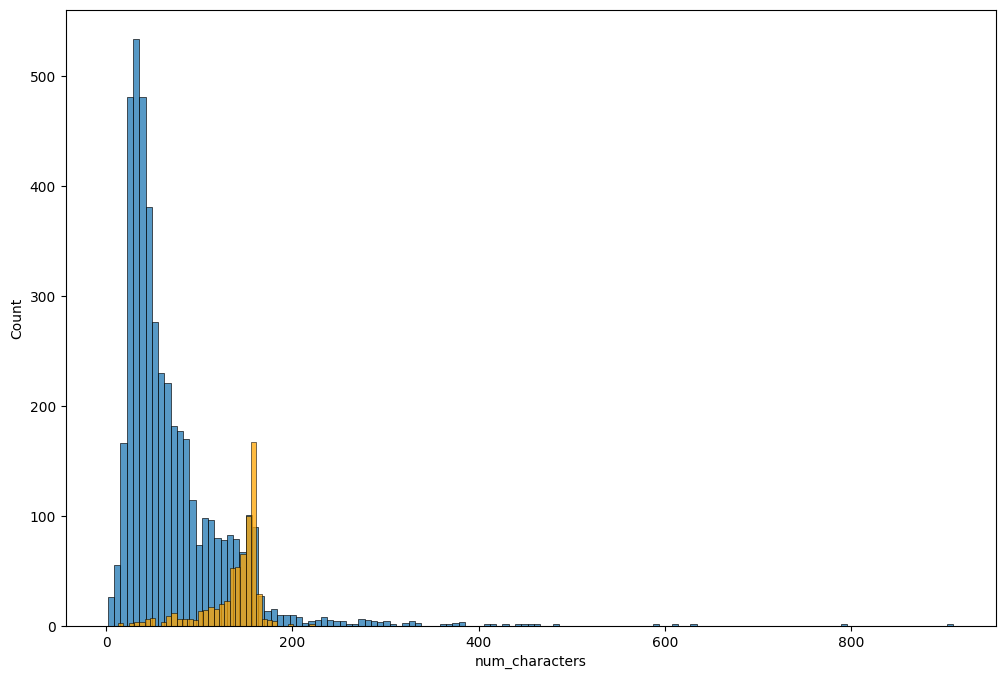

In [23]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['label'] == 0]['num_characters'])
sns.histplot(df[df['label'] == 1]['num_characters'], color='orange')

<Axes: xlabel='num_words', ylabel='Count'>

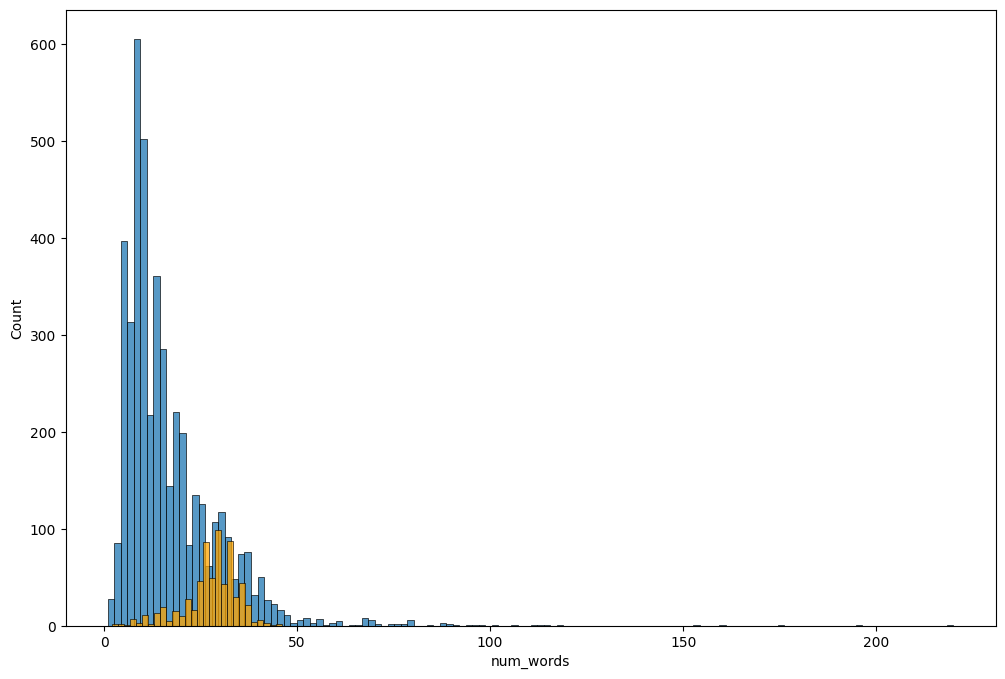

In [24]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'], color='orange')

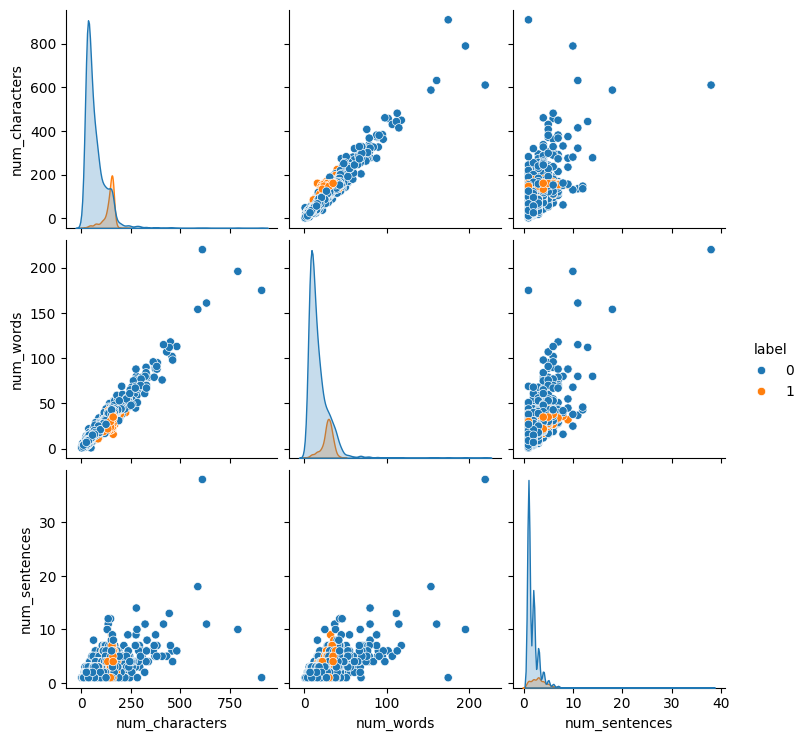

In [25]:
sns.pairplot(df, hue='label')

## Data Preprocessing

In [38]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    
    y = ' '.join(y)
    
    return y

[nltk_data] Downloading package stopwords to C:\Users\Raj
[nltk_data]     Bhuva\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [39]:
transform_text(df['message'][5])

'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv'

In [40]:
df['transformed_message'] = df['message'].apply(transform_text)
df.sample(5)

,label,message,num_characters,num_words,num_sentences,transformed_message
875,1,"Shop till u Drop, IS IT YOU, either 10K, 5K, å...",158,35,2,shop till u drop either 10k 5k cash travel vou...
3789,0,I love you !!! You know? Can you feel it? Does...,157,43,7,love know feel make belli warm wish love shall...
959,0,Where @,7,2,1,
1055,0,I'm at work. Please call,24,7,2,work pleas call
1121,1,Do you want 750 anytime any network mins 150 t...,153,29,1,want 750 anytim network min 150 text new video...


In [42]:
from wordcloud import WordCloud

wc = WordCloud(width=1024, height=1024, min_font_size=10, background_color='black')


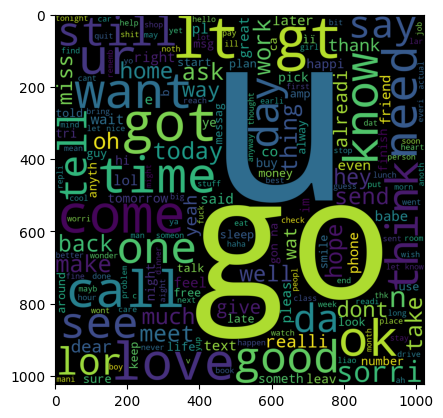

In [43]:
spam_wc = wc.generate(df[df['label'] == 0]['transformed_message'].str.cat(sep=" "))
plt.imshow(spam_wc)

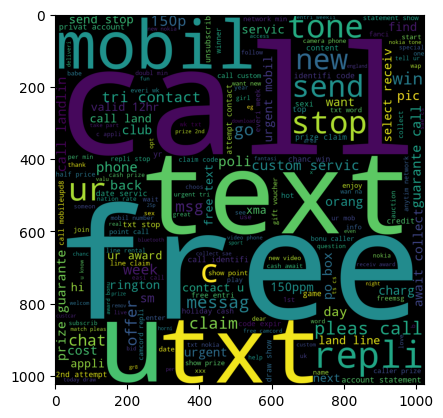

In [44]:
ham_wc = wc.generate(df[df['label'] == 1]['transformed_message'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [45]:
spam_corpus = []

for msg in df[df['label'] == 1]['transformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

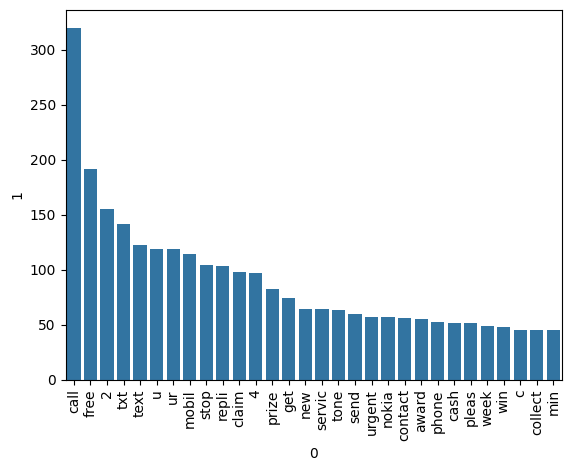

In [46]:
from collections import Counter

x = Counter(spam_corpus).most_common(30)
x = pd.DataFrame(x)

sns.barplot(data=x, x= 0, y= 1)
plt.xticks(rotation='vertical')
plt.show()

In [47]:
spam_corpus = []

for msg in df[df['label'] == 0]['transformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

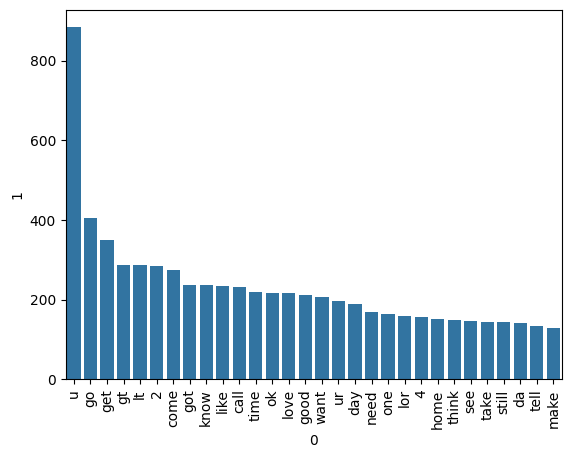

In [48]:
from collections import Counter

x = Counter(spam_corpus).most_common(30)
x = pd.DataFrame(x)

sns.barplot(data=x, x= 0, y= 1)
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [49]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [50]:
X = tfidf.fit_transform(df['transformed_message']).toarray()
X.shape

(5169, 3000)

In [51]:
y = df['label'].values

In [52]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [53]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [54]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [55]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [56]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
# we use tfidf -> MNB

: 

## Improvement


In [ ]:
# # yet to see
# https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbVpxdDNiQlZHZzNMSms0NlV6YmJqLUtTMVNVd3xBQ3Jtc0tuM3BYVWIyTWk4VTRCSFN6MDA2YWYxMlZhY2dPai1ZamZleHBFOU96bzBmcFRQTG1RbHdKZ0hSXzExRVUtYWdoa2hKTFFwTVdxSWtjNmduT2tkWG5MMlp2YnJVaHVoV2htWXpfajBHdERJcmptc0dpOA&q=https%3A%2F%2Fgithub.com%2Fcampusx-official%2Fsms-spam-classifier&v=YncZ0WwxyzU

: 

In [57]:
import pickle 

pickle.dump(tfidf,open('vectroizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))